In [235]:
#import all the necessary libraries
from random import random #random library
import matplotlib.pyplot as plt #graphing library
import requests as req #api requesting library
import pandas as pd #dataframe tools library
import seaborn #graphic visualization library
import json
import numpy as np
from collections import Counter

In [236]:
api_key = "1cb8c986583bd3f3e6a53ab801b9ab15"
api_secret = "530fd7db491ca69eeb95dfd46232b35e"
url = "http://api.petfinder.com/"

In [237]:
shelterfind_query_url = url + "shelter.find?" + "key=" + api_key + "&count=1" + "&name=animal" "&format=json" + "&location="
shelter_getpets_url = url + "shelter.getPets?" + "key=" + api_key + "&format=json" + "&count=200" + "&output=id" + "&id="
pets_byid_url = url + "pet.get?" + "key=" + api_key + "&format=json" + "&id="

In [238]:
with open("california_cities.csv") as cities:
    cities_reader = csv.reader(cities)
    
    cities = [city[0] for city in cities_reader]
    
    cities = cities[3:7]
    print(cities)
    
    #example url: http://api.petfinder.com/shelter.find?key=1cb8c986583bd3f3e6a53ab801b9ab15&location=san%20francisco,ca&format=json

    shelter_find_query = [req.get(shelterfind_query_url + city + ",ca").json() for city in cities]
    print(json.dumps(shelter_find_query, indent=2))

['San Jose', 'San Francisco', 'Sacramento', 'Oakland']
[
  {
    "@encoding": "iso-8859-1",
    "@version": "1.0",
    "petfinder": {
      "@xmlns:xsi": "http://www.w3.org/2001/XMLSchema-instance",
      "lastOffset": {
        "$t": "1"
      },
      "shelters": {
        "shelter": {
          "country": {
            "$t": "US"
          },
          "longitude": {
            "$t": "-121.8839"
          },
          "name": {
            "$t": "City of San Jos\u00e9 Animal Care Center"
          },
          "phone": {
            "$t": "408-578-7297"
          },
          "state": {
            "$t": "CA"
          },
          "address2": {},
          "email": {},
          "city": {
            "$t": "San Jose"
          },
          "zip": {
            "$t": "95112"
          },
          "fax": {},
          "latitude": {
            "$t": "37.3468"
          },
          "id": {
            "$t": "CA595"
          },
          "address1": {
            "$t": "2750 Monter

In [239]:
shelter_id_data_full = [data.get("petfinder").get("shelters").get("shelter").get("id").get("$t") for data in shelter_find_query]
shelter_id_data_full

['CA595', 'CA326', 'CA237', 'CA714']

In [240]:
len(shelter_id_data_full)

shelter_getpets_data = [req.get(shelter_getpets_url + shelter).json() for shelter in shelter_id_data_full]
shelter_getpets_data

[{'@encoding': 'iso-8859-1',
  '@version': '1.0',
  'petfinder': {'@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
   '@xsi:noNamespaceSchemaLocation': 'http://api.petfinder.com/schemas/0.9/petfinder.xsd',
   'header': {'status': {'code': {'$t': '100'}, 'message': {}},
    'timestamp': {'$t': '2017-08-31T06:05:19Z'},
    'version': {'$t': '0.1'}},
   'lastOffset': {'$t': '108'},
   'petIds': {'id': [{'$t': '38032334'},
     {'$t': '38436009'},
     {'$t': '38902771'},
     {'$t': '38972300'},
     {'$t': '39035152'},
     {'$t': '39046937'},
     {'$t': '39046939'},
     {'$t': '39061867'},
     {'$t': '39072710'},
     {'$t': '39110809'},
     {'$t': '39124229'},
     {'$t': '39124243'},
     {'$t': '39124244'},
     {'$t': '39124245'},
     {'$t': '39124246'},
     {'$t': '39147036'},
     {'$t': '39158285'},
     {'$t': '39177718'},
     {'$t': '39177719'},
     {'$t': '39177720'},
     {'$t': '39177721'},
     {'$t': '39179964'},
     {'$t': '39179965'},
     {'$t': '3917

In [241]:
pet_id_data_full = [data.get("petfinder").get("petIds").get("id") for data in shelter_getpets_data]
pet_id_data_full

[[{'$t': '38032334'},
  {'$t': '38436009'},
  {'$t': '38902771'},
  {'$t': '38972300'},
  {'$t': '39035152'},
  {'$t': '39046937'},
  {'$t': '39046939'},
  {'$t': '39061867'},
  {'$t': '39072710'},
  {'$t': '39110809'},
  {'$t': '39124229'},
  {'$t': '39124243'},
  {'$t': '39124244'},
  {'$t': '39124245'},
  {'$t': '39124246'},
  {'$t': '39147036'},
  {'$t': '39158285'},
  {'$t': '39177718'},
  {'$t': '39177719'},
  {'$t': '39177720'},
  {'$t': '39177721'},
  {'$t': '39179964'},
  {'$t': '39179965'},
  {'$t': '39179969'},
  {'$t': '39179973'},
  {'$t': '39179974'},
  {'$t': '39181259'},
  {'$t': '39190589'},
  {'$t': '39190591'},
  {'$t': '39190592'},
  {'$t': '39190593'},
  {'$t': '39190595'},
  {'$t': '39190598'},
  {'$t': '39190615'},
  {'$t': '39194108'},
  {'$t': '39195782'},
  {'$t': '39198218'},
  {'$t': '39205598'},
  {'$t': '39205599'},
  {'$t': '39207521'},
  {'$t': '39218990'},
  {'$t': '39225933'},
  {'$t': '39225934'},
  {'$t': '39225935'},
  {'$t': '39225937'},
  {'$t': '

In [242]:
sanjose_petids_list = pet_id_data_full[0]
sanfrancisco_petids_list = pet_id_data_full[1]
sacramento_petids_list = pet_id_data_full[2]
oakland_petids_list = pet_id_data_full[3]

print(sanfrancisco_petids_list)

sanjose_petids = [number["$t"] for number in sanjose_petids_list]
sanfrancisco_petids = [number["$t"] for number in sanfrancisco_petids_list]
sacramento_petids = [number["$t"] for number in sacramento_petids_list]
oakland_petids_list = [number["$t"] for number in oakland_petids_list]

[{'$t': '37623738'}, {'$t': '38052499'}, {'$t': '38140159'}, {'$t': '38572264'}, {'$t': '38572265'}, {'$t': '38612681'}, {'$t': '38626623'}, {'$t': '38650493'}, {'$t': '38704063'}, {'$t': '38729692'}, {'$t': '38744651'}, {'$t': '38773544'}, {'$t': '38829274'}, {'$t': '38829275'}, {'$t': '38829276'}, {'$t': '38829281'}, {'$t': '38829284'}, {'$t': '38829285'}, {'$t': '38829286'}, {'$t': '38829287'}, {'$t': '38829288'}, {'$t': '38829291'}, {'$t': '38829292'}, {'$t': '38846342'}, {'$t': '38858976'}, {'$t': '38895728'}, {'$t': '38914541'}, {'$t': '38914542'}, {'$t': '38928492'}, {'$t': '38970290'}, {'$t': '38982801'}, {'$t': '39044999'}, {'$t': '39053126'}, {'$t': '39055014'}, {'$t': '39073569'}, {'$t': '39074951'}, {'$t': '39105495'}, {'$t': '39117722'}, {'$t': '39143533'}, {'$t': '39143534'}, {'$t': '39159206'}, {'$t': '39159210'}, {'$t': '39182411'}, {'$t': '39182414'}, {'$t': '39182415'}, {'$t': '39182416'}, {'$t': '39182417'}, {'$t': '39182418'}, {'$t': '39193534'}, {'$t': '39196710'},

In [243]:
pets_byid_sanjose = [req.get(pets_byid_url + petid).json() for petid in sanjose_petids]
pets_byid_sanfrancisco = [req.get(pets_byid_url + petid).json() for petid in sanfrancisco_petids]
pets_byid_sacramento = [req.get(pets_byid_url + petid).json() for petid in sacramento_petids]
pets_byid_oakland = [req.get(pets_byid_url + petid).json() for petid in oakland_petids]

pets_byid_sacramento

[{'@encoding': 'iso-8859-1',
  '@version': '1.0',
  'petfinder': {'@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
   '@xsi:noNamespaceSchemaLocation': 'http://api.petfinder.com/schemas/0.9/petfinder.xsd',
   'header': {'status': {'code': {'$t': '100'}, 'message': {}},
    'timestamp': {'$t': '2017-08-31T06:06:09Z'},
    'version': {'$t': '0.1'}},
   'pet': {'age': {'$t': 'Adult'},
    'animal': {'$t': 'Dog'},
    'breeds': {'breed': {'$t': 'Pit Bull Terrier'}},
    'contact': {'address1': {'$t': '2127 Front Street'},
     'address2': {},
     'city': {'$t': 'Sacramento'},
     'email': {'$t': 'animalcare@cityofsacramento.org'},
     'fax': {},
     'phone': {'$t': '(916) 808-7387'},
     'state': {'$t': 'CA'},
     'zip': {'$t': '95818'}},
    'description': {'$t': "Leela is an energetic dog who loves being around people. She would love a home where she has a nice backyard to run around in and people to play with her or take her for walks. When it's time to relax she is happ

In [244]:
type_animal_sanjose = [data.get("petfinder").get("pet").get("animal").get("$t") for data in pets_byid_sanjose]
type_animal_sanfrancisco = [data.get("petfinder").get("pet").get("animal").get("$t") for data in pets_byid_sanfrancisco]
type_animal_sacramento = [data.get("petfinder").get("pet").get("animal").get("$t") for data in pets_byid_sacramento]
type_animal_oakland = [data.get("petfinder").get("pet").get("animal").get("$t") for data in pets_byid_oakland]

sanjose_dogs = type_animal_sanjose.count("Dog")
sanjose_cats = type_animal_sanjose.count("Cat")
sanjose_others = len(type_animal_sanjose) - (sanjose_cats + sanjose_dogs)
sanjose_animal_numbers = [sanjose_dogs, sanjose_cats, sanjose_others]

sanfrancisco_dogs = type_animal_sanfrancisco.count("Dog")
sanfrancisco_cats = type_animal_sanfrancisco.count("Cat")
sanfrancisco_others = len(type_animal_sanfrancisco) - (sanfrancisco_cats + sanfrancisco_dogs)
sanfrancisco_animal_numbers = [sanfrancisco_dogs, sanfrancisco_cats, sanfrancisco_others]

sacramento_dogs = type_animal_sacramento.count("Dog")
sacramento_cats = type_animal_sacramento.count("Cat")
sacramento_others = len(type_animal_sacramento) - (sacramento_cats + sacramento_dogs)
sacramento_animal_numbers = [sacramento_dogs, sacramento_cats, sacramento_others]

oakland_dogs = type_animal_oakland.count("Dog")
oakland_cats = type_animal_oakland.count("Cat")
oakland_others = len(type_animal_oakland) - (oakland_cats + oakland_dogs)
oakland_animal_numbers = [oakland_dogs, oakland_cats, oakland_others]


type_animal_data = pd.DataFrame({
    "Animal Types": ["Dogs", "Cats", "Other"],
    "San Jose": sanjose_animal_numbers,
    "San Francisco": sanfrancisco_animal_numbers,
    "Sacramento": sacramento_animal_numbers,
    "Oakland": oakland_animal_numbers
})

type_animal_data

,Animal Types,Oakland,Sacramento,San Francisco,San Jose
0,Dogs,8,63,12,33
1,Cats,33,28,39,56
2,Other,6,0,21,19


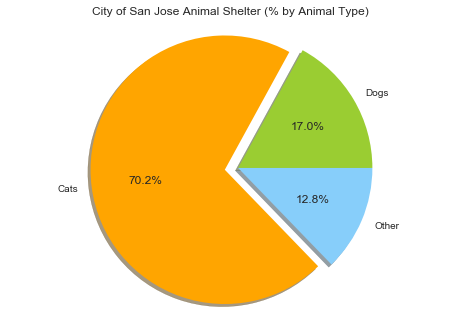

In [277]:
labels = ["Dogs", "Cats", "Other"]
sizes = [oakland_dogs, oakland_cats, oakland_others]
colors = ["yellowgreen", "orange", "lightskyblue"]
# how big is the explosion, and what should explode?
explode = (0, .1, 0)

# the first two %'s format the number. The last one is what is displayed on the graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=0)
plt.title("Oakland Animal Services (% by Animal Type)")
plt.axis("equal") # doesn't stretch when equal
plt.savefig("oakland_animaltype.png")
plt.show()

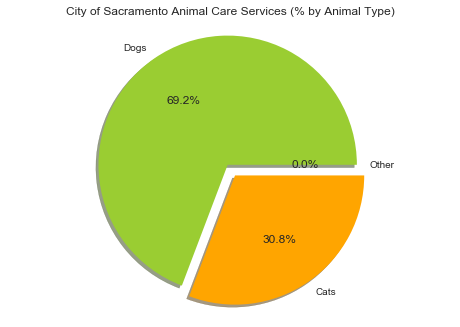

In [246]:
labels = ["Dogs", "Cats", "Other"]
sizes = [sacramento_dogs, sacramento_cats, sacramento_others]
colors = ["yellowgreen", "orange", "lightskyblue"]
# how big is the explosion, and what should explode?
explode = (0, .1, 0)

# the first two %'s format the number. The last one is what is displayed on the graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("City of Sacramento Animal Care Services (% by Animal Type)")
plt.axis("equal") # doesn't stretch when equal
plt.savefig("sacramento_animaltype.png")
plt.show()

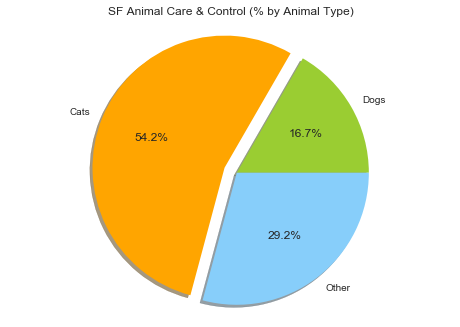

In [247]:
labels = ["Dogs", "Cats", "Other"]
sizes = [sanfrancisco_dogs, sanfrancisco_cats, sanfrancisco_others]
colors = ["yellowgreen", "orange", "lightskyblue"]
# how big is the explosion, and what should explode?
explode = (0, .1, 0)

# the first two %'s format the number. The last one is what is displayed on the graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("SF Animal Care & Control (% by Animal Type)")
plt.axis("equal") # doesn't stretch when equal
plt.savefig("sf_animaltype.png")
plt.show()

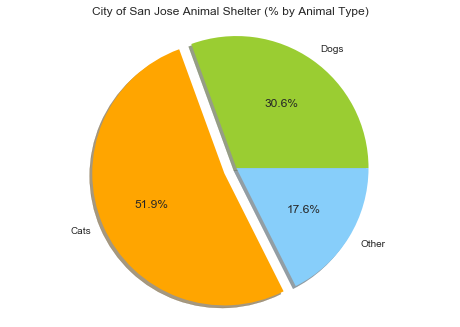

In [279]:
labels = ["Dogs", "Cats", "Other"]
sizes = [sanjose_dogs, sanjose_cats, sanjose_others]
colors = ["yellowgreen", "orange", "lightskyblue"]
# how big is the explosion, and what should explode?
explode = (0, .1, 0)

# the first two %'s format the number. The last one is what is displayed on the graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=0)
plt.axis("equal") # doesn't stretch when equal
plt.title("City of San Jose Animal Shelter (% by Animal Type)")
plt.savefig("sanjose_animaltype.png")
plt.show()

In [276]:
#Analytical Calculations and Observations
#using resources from: https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics
#44% of dogs are euthanized, 56% of cats are euthanized
cat_percentages = [70.2, 30.8, 45, 51.7]
dog_percentages = [17, 69.2, 20, 31.5]
other_percentages = [12.8, 0, 35, 16.8]

cat_euth_rate = .56
dog_euth_rate = .44

cat_average = np.mean(cat_percentages)
#On average, there are about 49.4% cats in these Northern California shelters
dog_average = np.mean(dog_percentages)
#On average, there are about 34.4% dogs in these Northern California shelters

all_cats = sanjose_cats + sacramento_cats + oakland_cats + sanfrancisco_cats
print(all_cats)
all_dogs = sanjose_dogs + sacramento_dogs + oakland_dogs + sanfrancisco_dogs
print(all_dogs)

euthanized_cats = all_cats * cat_euth_rate
print(euthanized_cats)
#87 out of the 156 will be euthanized
euthanized_dogs = all_dogs * dog_euth_rate
#51 out of the 116 will be euthanized
print(euthanized_dogs)

156
116
87.36000000000001
51.04
